# State of the Union Analyses
***

## Background

The State of the Union (SotU) is a annual message delivered by the president of the United States to the Congress. It is a chance for the president to speak to the nation and make a case for their agenda and current administration. The speech lays out the priorities for an administration and president, as well as the overall health, especially economic, of the nation. Major issues of the day are addressed. 

For this analysis we have the trascribed speeches of each SotU between 1945 and 2016. The time period covers 12 different presidents, 6 Democrats and 6 Republicans. The raw text for each speech can be found [here](https://github.com/Zack-Berman/NLP-State-of-the-Union/blob/master/state-of-the-union-corpus.zip).

## Questions

The president is mandated by the Constitution to give a SotU speech every single year; and given that the SotU is perhaps the most important political speech given each and every year, we have a wealth of data to dive into. Using NLP algorithms, we are able to break down and analyze each speech in great detail to try to detect patterns and trends. This project will focus on answering the following questions in order to give this project direction:

1. Are there variations in tone or sentiment between presidents?
2. What could account for changes in sentiment in each SotU? Are there indictors which could predict sentiment?
3. How does the language used in these speeches change over time, and are their noticable patterns?
4. Are there major differences in the speeches given between presidents of the two different political parties.

## NLP Basics

Natural language processing (NLP) is a field in machine learning that focuses on the interaction of human language and computers. In partiular NLP is concerned with analyzing large amounts of natural language data to help us better understand and interpret human language. One of the most important tools of any NLP package is a process known as tokenization. Tokenization breaks down a sentence, speech, book, etc. into individual words which are referred to as tokens. Each token can be analyzed and manipulated. A token can be assigned a part of speech, sentiment, subjectivity, can be made singluar or plural, etc. 

Another vital component of any NLP is the concept of stop words. Stop words are commonly used words (ie. the, and, is) that a program has been taught to ignore. If you are looking for the most common words used in a book, having these words show up as the highest results ever time would skew many analyses, and therefore are often left out.

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning, RuntimeWarning])

C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
#import all the SOTU txt files
data_folder = 'state-of-the-union-corpus-1989-2017'
file_list = [os.path.join(data_folder, fn) for fn in os.listdir(data_folder)]

#create lists for the year and president who gave the speech
years = []
potus = []
for file in os.listdir(data_folder):
    year = file[:4]
    pres = file[5:-4]
    pres = re.sub('[^a-zA-Z]+', '', pres)
    years.append(year)
    potus.append(pres)

In [3]:
#create dataframe
df = pd.DataFrame(file_list, columns=['path'])
df['year'] = years
df['year'] = df['year'].astype(int)
df['president'] = potus

#create a list of Democrat presidents
dems = ['Truman', 'Kennedy', 'Johnson', 'Carter', 'Clinton', 'Obama']

#add party affiliation to the dataframe
df['party'] = df.president.apply(lambda x: 'Democrat' if x in dems else 'Republican')

In [4]:
#use textblob to tokenize the words in each speech
df['tokens'] = df.path.apply(lambda x: TextBlob(open(x, encoding='ISO-8859-1').read()).words)

#use textblob to perform a sentiment analysis of each speech
df['sentiment'] = df.path.apply(lambda x: TextBlob(open(x, encoding='ISO-8859-1').read()).sentiment.polarity)

In [5]:
#import GDP growth data since 1945
gdp_df = pd.read_csv('gdp_data.csv')
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])
gdp_df['year'] = gdp_df.Date.apply(lambda x: x.year).astype(int)
gdp_df['GDP Growth Rate'] = gdp_df['GDP Growth Rate'].apply(lambda x: x * 100)
gdp_df.sort_values(by='year', inplace=True)
gdp_df = gdp_df.reset_index()

df['gdp_rate'] = gdp_df['GDP Growth Rate']

In [6]:
#import unemployment rate data and add to dataframe
employ_df = pd.read_csv('unemployment_data.csv')
df['unemployment_rate'] = employ_df['Rate'] * 100

In [16]:
#check data types and display dataframe
print(df.shape)
print(df.dtypes)
df.head()

(74, 8)
path                  object
year                   int32
president             object
party                 object
tokens                object
sentiment            float64
gdp_rate             float64
unemployment_rate    float64
dtype: object


,path,year,president,party,tokens,sentiment,gdp_rate,unemployment_rate
0,state-of-the-union-corpus-1989-2017\1945-Truma...,1945,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ADDRESS, BEF...",0.103764,11.45,1.9
1,state-of-the-union-corpus-1989-2017\1946-Truma...,1946,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, MESSAGE, TO,...",0.111545,10.67,3.9
2,state-of-the-union-corpus-1989-2017\1947-Truma...,1947,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.136731,-0.01,3.9
3,state-of-the-union-corpus-1989-2017\1948-Truma...,1948,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.165403,3.80,4.0
4,state-of-the-union-corpus-1989-2017\1949-Truma...,1949,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.155075,-1.50,6.6


## Sentiment Analysis

A sentiment analysis analyzes each token in from language data and assigns them a rating based on how positive or negative the connotation of that token is. In this instance, the scale goes from -1 to 1 with -1 being the most negative words possible and 1 being the words with a very positive meaning. For example, the word 'great' would have a higher score than 'good, and the word 'awful' would have a lower score than the word 'bad'. Words with no positive or negative leanings are given a score of zero and not factored into the analysis. The package TextBlob has a built in algorthim which has a long list of words already scored, and I will be utilizing that feature.

Below, you can see the sentiment analyis grouped by president. Every SotU has had an overall positive sentiment ranging from .08 to .20. The SotU must strike a careful balance. On one hand, the SotU is a reflection of an adminstration and the health of the nation, and therefore the president would not want to overally negative, as people would assume the administration is doing a poor job. On the other hand, if the SotU is too optimistic or positive, an administration could come off as out of touch to the suffering of certain sectors of the populous, alienating them. It seems the strategy is to find a balance of, what I will call 'cautious optimism.' Things are going well, but there is always room for improvement.

How these sentiments changed throughout a presidency is also worth noting. Of the 12 presidents included here, 7 had their sentiment scores increase over time. Of the Democrats, only Kennedy showed a negative trend in sentiment, that was very minor. Conversly, the Republican presidents were split evenly, half trending positive and half negative. 

### Economic Factors

Each presidency has to deal with a unique set of issues and challenges, but one constant is the state of the economy. I wanted to take a surface level look at some important economic indicators to see if there was any correlation between changing sentiment. 

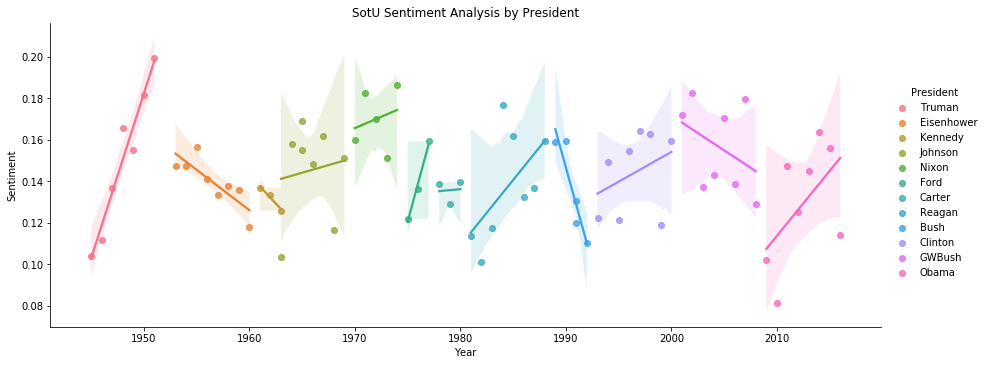

In [8]:
#plot sentiment analysis data
g = sns.lmplot(x="year", y="sentiment", hue="president", aspect=2.5, truncate=True, data=df)
g._legend.set_title('President')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('SotU Sentiment Analysis by President')

plt.show()

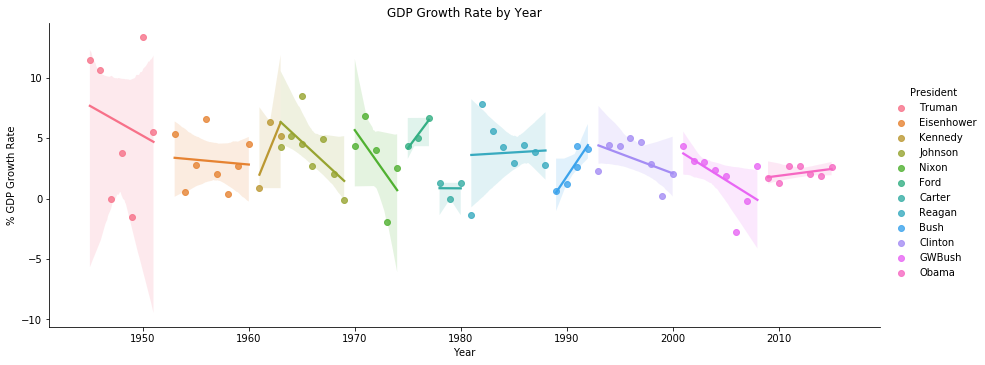

In [9]:
#plot GDP growth data
g1 = sns.lmplot(x="year", y="gdp_rate", hue="president", aspect=2.5, truncate=True, data=df)
g1._legend.set_title('President')
plt.xlabel('Year')
plt.ylabel('% GDP Growth Rate')
plt.title('GDP Growth Rate by Year')

plt.show()

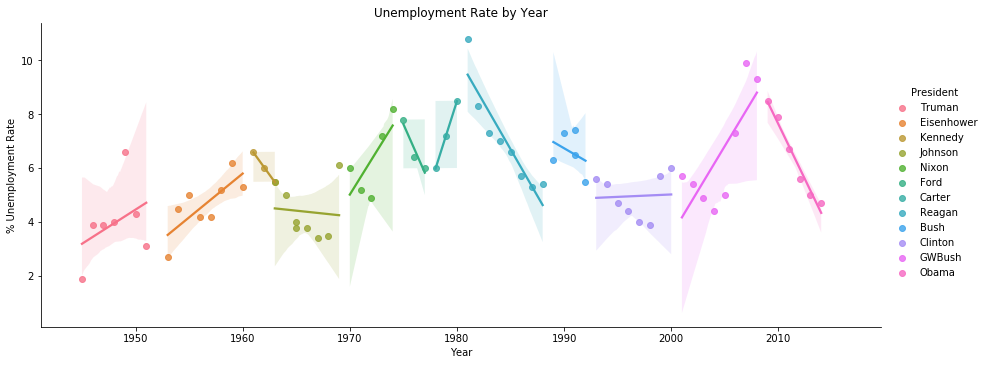

In [10]:
#plot unemployment rate  data
g2 = sns.lmplot(x="year", y="unemployment_rate", hue="president", aspect=2.5, truncate=True, data=df)
g2._legend.set_title('President')
plt.xlabel('Year')
plt.ylabel('% Unemployment Rate')
plt.title('Unemployment Rate by Year')

plt.show()

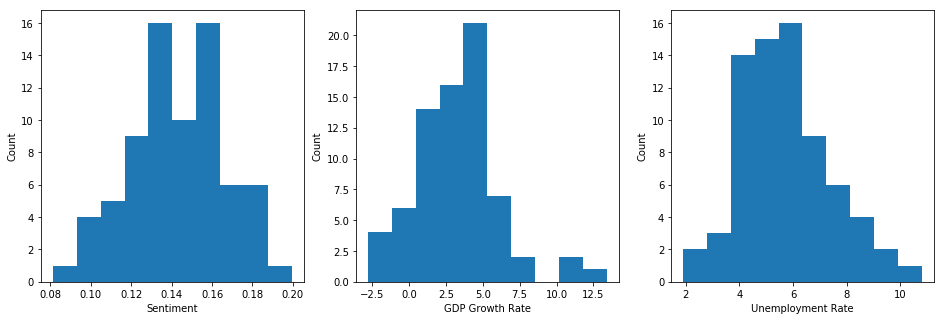

In [15]:
plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.hist(df.sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(132)
plt.hist(df.gdp_rate.dropna())
plt.xlabel('GDP Growth Rate')
plt.ylabel('Count')

plt.subplot(133)
plt.hist(df.unemployment_rate.dropna())
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')

plt.show()

In [ ]:
from scipy.stats import pearsonr

In [11]:
#utility function to clean text
def text_cleaner(text):
    
    # Visual inspection shows spaCy does not recognize the double dash '--', get rid of it
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in brakets.
    text = re.sub('[\[].*?[\]]', '', text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text

In [12]:
#load spacy model
nlp = spacy.load('en_core_web_sm')

#add features with text for each speech and run through the text cleaner
df['text'] = df.path.apply(lambda x: open(x, encoding='ISO-8859-1').read())
df['text'] = df.text.apply(lambda x: text_cleaner(x))

C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\zberma2\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [13]:
df['nlp'] = df.text.apply(lambda x: nlp(x))
df.head()

,path,year,president,party,tokens,sentiment,gdp_rate,unemployment_rate,text,nlp
0,state-of-the-union-corpus-1989-2017\1945-Truma...,1945,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ADDRESS, BEF...",0.103764,11.45,1.9,PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A J...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ADDRESS, BE..."
1,state-of-the-union-corpus-1989-2017\1946-Truma...,1946,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, MESSAGE, TO,...",0.111545,10.67,3.9,PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CON...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, MESSAGE, TO..."
2,state-of-the-union-corpus-1989-2017\1947-Truma...,1947,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.136731,-0.01,3.9,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."
3,state-of-the-union-corpus-1989-2017\1948-Truma...,1948,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.165403,3.80,4.0,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."
4,state-of-the-union-corpus-1989-2017\1949-Truma...,1949,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.155075,-1.50,6.6,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."


In [14]:
#save a list of stop words
stop_words = stopwords.words('english')

#utility function that retuns a list of the most common words
def word_frequencies(text, include_stop=False):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        #exclude punctuation, numeric characters and words in the stop list
        if not token.is_punct and token.is_alpha and not token.is_stop and token.lower_ not in stop_words:
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [15]:
from collections import Counter

#use word frequency function to return the top 10 words used in each speech
freq_list = []
for speeches in df.nlp:
    sotus_freq = word_frequencies(speeches, include_stop=False).most_common(10)
    freq_list.append(sotus_freq)
    
for a, b, c in zip(df.president, df.year, freq_list):
    print(a, b, c)

Truman 1945 [('peace', 23), ('world', 20), ('America', 11), ('people', 10), ('nations', 10), ('hope', 8), ('freedom', 7), ('great', 6), ('shall', 6), ('man', 5)]
Truman 1946 [('dollars', 207), ('year', 181), ('war', 165), ('million', 137), ('fiscal', 125), ('expenditures', 93), ('United', 91), ('program', 90), ('Government', 90), ('billion', 83)]
Truman 1947 [('Congress', 27), ('labor', 26), ('national', 22), ('program', 21), ('management', 18), ('Government', 17), ('war', 16), ('year', 15), ('world', 15), ('housing', 14)]
Truman 1948 [('world', 29), ('economic', 23), ('people', 22), ('great', 17), ('Nation', 15), ('Congress', 14), ('program', 14), ('tax', 14), ('United', 13), ('States', 13)]
Truman 1949 [('Congress', 17), ('Government', 17), ('people', 15), ('world', 14), ('prosperity', 12), ('production', 12), ('good', 10), ('great', 10), ('housing', 10), ('economy', 9)]
Truman 1950 [('world', 27), ('Congress', 20), ('economic', 19), ('years', 18), ('life', 17), ('great', 15), ('peop

Bush 1991 [('world', 29), ('America', 20), ('know', 18), ('American', 17), ('freedom', 14), ('future', 14), ('people', 13), ('power', 12), ('States', 11), ('new', 10)]
Bush 1991 [('world', 24), ('war', 20), ('peace', 15), ('people', 13), ('American', 12), ('home', 12), ('new', 12), ('time', 10), ('Let', 10), ('America', 9)]
Bush 1992 [('people', 26), ('know', 24), ('world', 23), ('plan', 23), ('right', 19), ('American', 18), ('country', 17), ('new', 17), ('help', 17), ('Congress', 14)]
Clinton 1993 [('people', 45), ('new', 29), ('American', 28), ('plan', 26), ('country', 26), ('Government', 24), ('care', 24), ('jobs', 24), ('work', 23), ('year', 22)]
Clinton 1994 [('people', 63), ('health', 41), ('care', 40), ('work', 34), ('year', 31), ('Congress', 24), ('American', 22), ('world', 22), ('know', 22), ('country', 21)]
Clinton 1995 [('people', 73), ('work', 42), ('Government', 35), ('country', 34), ('years', 29), ('year', 29), ('time', 28), ('way', 28), ('new', 27), ('know', 26)]
Clinton

In [16]:
from wordcloud import WordCloud

#function that will create a word cloud for each of of the speeches
def word_clouds(text_list):
    plt.figure(figsize=(15, 100))
    n = 0
    x = 1
    for texts in text_list:
        plt.subplot(40, 2, x)
        wordcloud = WordCloud(stopwords=stop_words, max_words=20).generate(texts)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(df.president[n] + ' ' + str(df.year[n]))
        plt.axis("off")
        n += 1
        x += 1
    plt.tight_layout()
    plt.show()

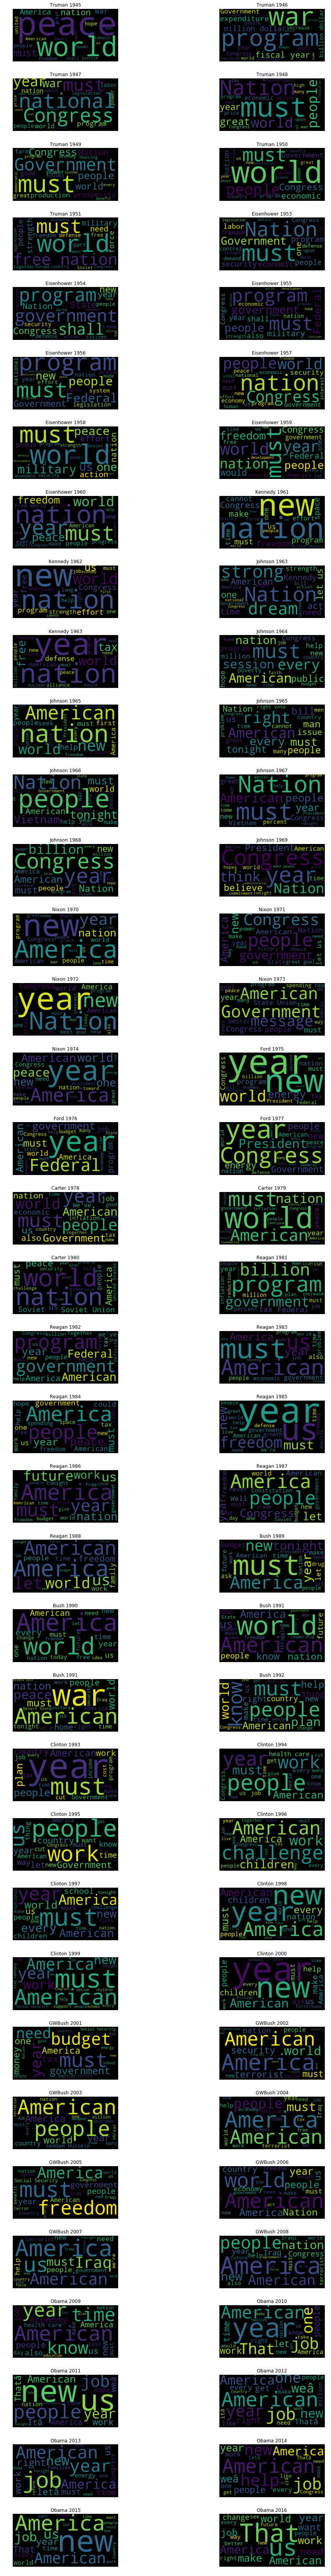

In [17]:
word_clouds(df.text)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

X_train, X_test, y_train, y_test = train_test_split(df.text, df.path, test_size=0.4, random_state=0)

#build TFIDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the speeches
                             min_df=5, # only use words that appear at least five times
                             stop_words='english', #remove stop words
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#inverse document frequencies in our weighting
                             norm=u'l2', #a correction factor so that longer and shorter speeches get treated equally
                             smooth_idf=True #prevents divide-by-zero errors
                            )

In [19]:
#Applying the vectorizer
sotus_tfidf = vectorizer.fit_transform(df.text)
print("Number of features: %d" % sotus_tfidf.get_shape()[1])

Number of features: 3845


In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 3845 to 65.
svd= TruncatedSVD(65)
lsa = make_pipeline(svd, Normalizer(copy=False))
#Run SVD on the sotus data, then project
sotus_lsa = lsa.fit_transform(sotus_tfidf)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

xs, ys = sotus_lsa[:, 0], sotus_lsa[:, 1]

Explained variance of the SVD step: 93%


In [21]:
file_list = []
for paths in df.path:
    path, file = paths.split('\\')
    file_list.append(file)
    
#feature names
terms = vectorizer.get_feature_names()

In [22]:
#build a Kmeans cluster with two clusters
km = KMeans(n_clusters=2, random_state=42)
km.fit(sotus_tfidf)
clusters = km.labels_.tolist()

df['cluster'] = clusters

In [23]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(2):
    print("Cluster %d words:" % i, end=' ')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(terms[ind], end=', ')
    print('\n')

Top terms per cluster:

Cluster 0 words: shall, expenditures, farm, vietnam, recommend, recommendations, communist, peoples, aggression, employment, management, adequate, period, capacity, oil, reduction, xand, affairs, organization, mutual, 

Cluster 1 words: ll, iraq, don, parents, businesses, college, terrorists, 21st, medicare, bipartisan, kids, cuts, got, tell, class, terror, drugs, afghanistan, big, iraqi, 



In [24]:
#create data frame that has the cluster numbers and titles
kmean_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=file_list, party=df.party)) 

#group by cluster
groups = kmean_df.groupby('label')

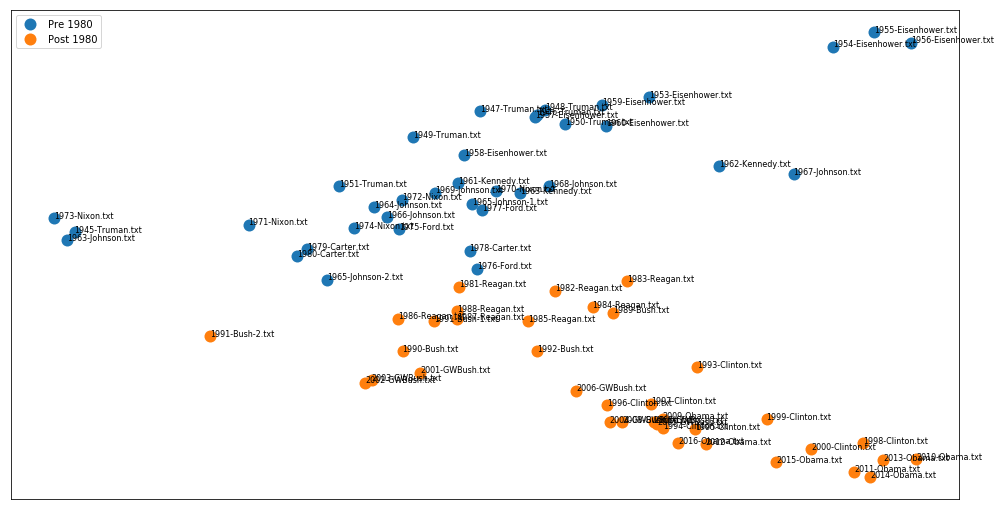

In [25]:
cluster_names = {0: 'Pre 1980', 1: 'Post 1980'}

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], #color='blues',
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df.loc[i]['x'], kmean_df.loc[i]['y'], kmean_df.loc[i]['title'], size=8)  

    
    
plt.show()

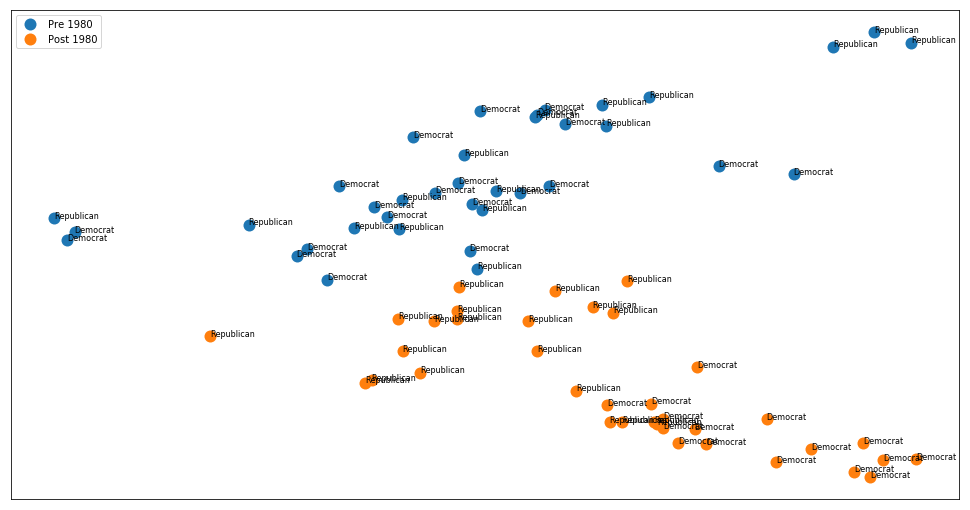

In [26]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df.loc[i]['x'], kmean_df.loc[i]['y'], kmean_df.loc[i]['party'], size=8)  

    
    
plt.show()

In [27]:
#Kmeans with 4 clusters
km1 = KMeans(n_clusters=4, random_state=420)
km1.fit(sotus_tfidf)
clusters1 = km1.labels_.tolist()

df['cluster1'] = clusters1

In [28]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids1 = km1.cluster_centers_.argsort()[:, ::-1] 

for i in range(4):
    print("Cluster %d words:" % i, end=' ')
    
    for ind in order_centroids1[i, :20]: #replace 6 with n words per cluster
        print(terms[ind], end=', ')
    print('\n')

Top terms per cluster:

Cluster 0 words: iraq, terrorists, iraqi, terror, saddam, al, terrorist, victory, hussein, qaeda, gulf, afghanistan, iraqis, coalition, regime, medicare, relief, enemy, enemies, funding, 

Cluster 1 words: ll, space, dream, tell, deficits, recovery, regulations, dreams, revolution, reduction, strategic, nicaragua, don, asking, yes, waste, bipartisan, excellence, leader, kennedy, 

Cluster 2 words: shall, expenditures, recommend, farm, vietnam, communist, recommendations, peoples, aggression, management, period, adequate, reduction, oil, employment, affairs, concern, agriculture, foundation, capacity, 

Cluster 3 words: college, businesses, ll, don, parents, 21st, class, got, companies, ought, kids, cuts, invest, donâ, bipartisan, medicare, global, students, republicans, democrats, 



In [29]:
cluster_names1 = {0: 'GW Bush', 1: 'Post 1980', 2: 'Pre 1980', 3: 'Post 1990 Democrats'}

#create data frame that has the cluster numbers and titles
kmean_df1 = pd.DataFrame(dict(x=xs, y=ys, label=clusters1, title=file_list, party=df.party)) 

#group by cluster
groups1 = kmean_df1.groupby('label')

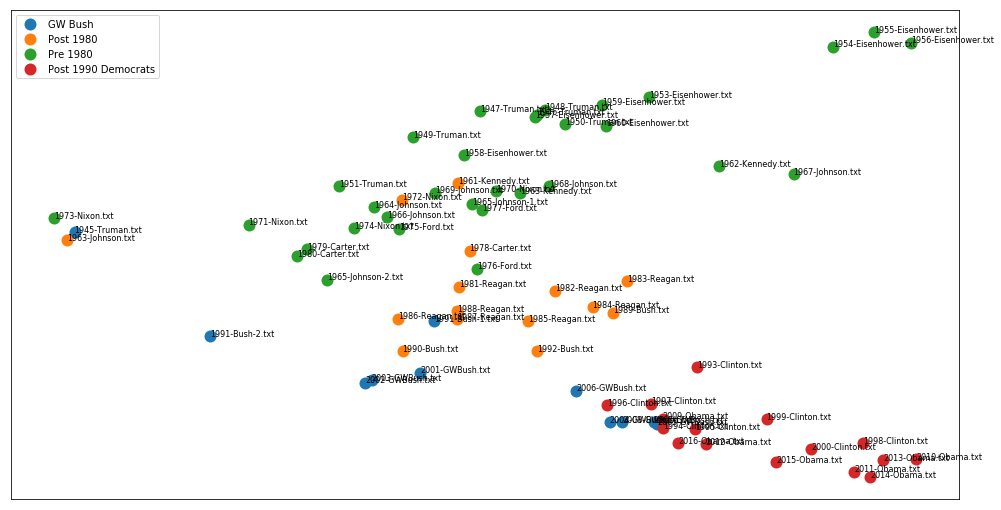

In [30]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for name, group in groups1:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names1[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df1.loc[i]['x'], kmean_df1.loc[i]['y'], kmean_df1.loc[i]['title'], size=8)  

    
    
plt.show()

In [31]:
from sklearn.cluster import SpectralClustering

#set up a spectral clustering model using 4 clusters
sc = SpectralClustering(n_clusters=4, random_state=1337)
sc.fit(sotus_tfidf)

#Predicted clusters.
predict=sc.fit_predict(sotus_tfidf)

clusters2 = sc.labels_.tolist()

In [32]:
cluster_names2 = {0: '1960-1990', 1: 'Post 1990 Democrats', 2: 'GW Bush', 3: 'Pre 1960'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
sc_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters2, title=file_list, party=df.party)) 

#group by cluster
groups2 = sc_df.groupby('label')

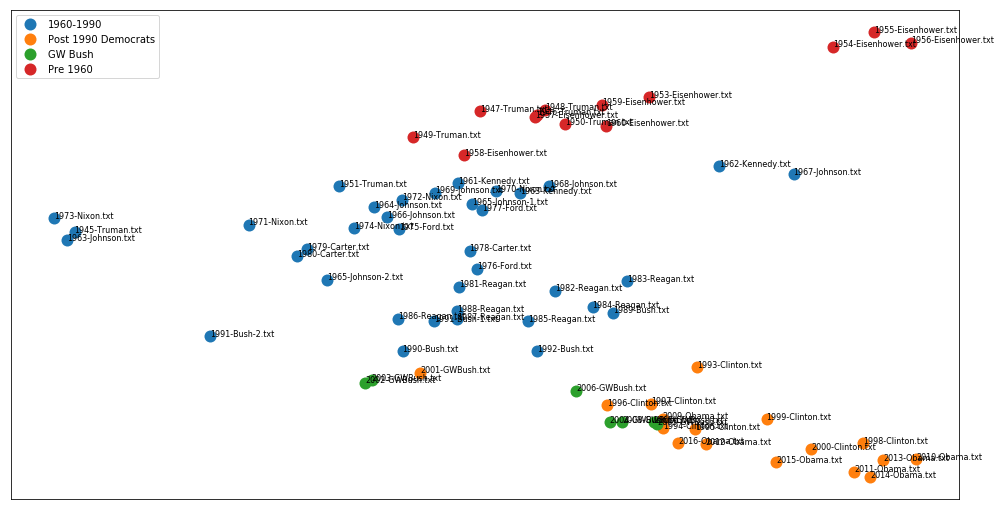

In [33]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
for name, group in groups2:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names2[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(sc_df.loc[i]['x'], sc_df.loc[i]['y'], sc_df.loc[i]['title'], size=8)  

    
    
plt.show()